XGBM & LGBM

Objective: The objective is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset.

EDA:

In [5]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [6]:
#loading training and testing dataset
train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')

In [9]:
train.shape,test.shape


((891, 12), (418, 11))

In [11]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
#information about training dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
#checking for null values
train.isnull().sum(),test.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [19]:
#summary statistics of training set
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

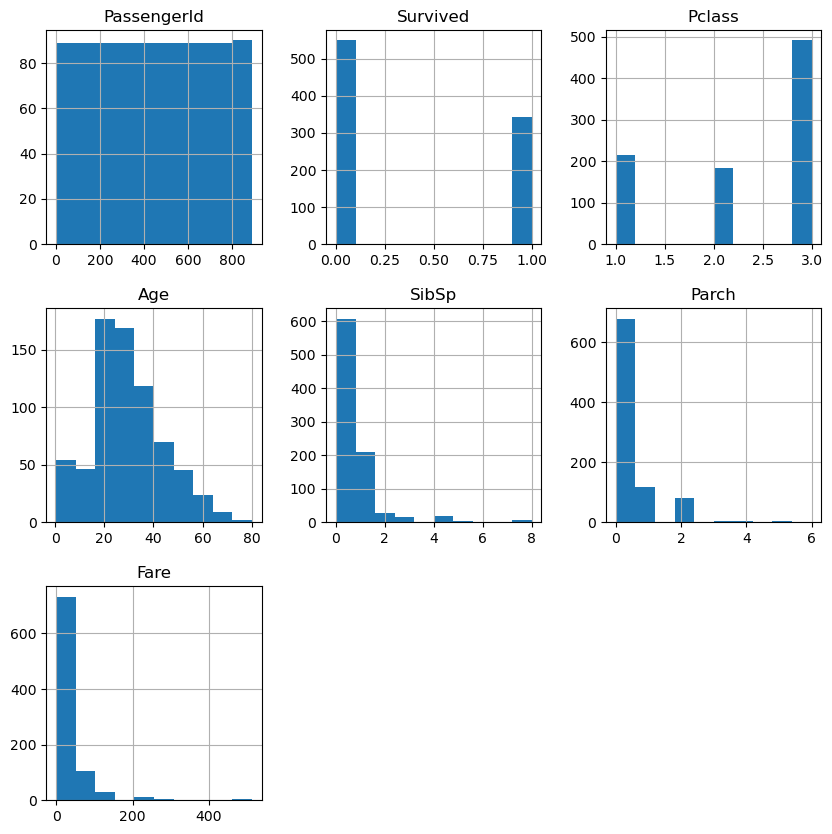

In [21]:
#histogram of training set
train.hist(figsize=(10,10))

<Axes: >

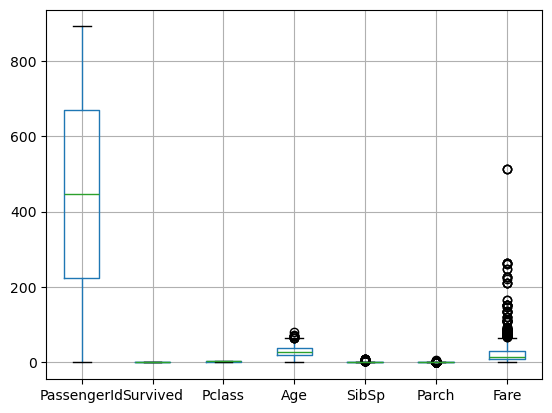

In [22]:
#visualizing training set using boxplot
train.boxplot()

<Axes: xlabel='Survived', ylabel='Age'>

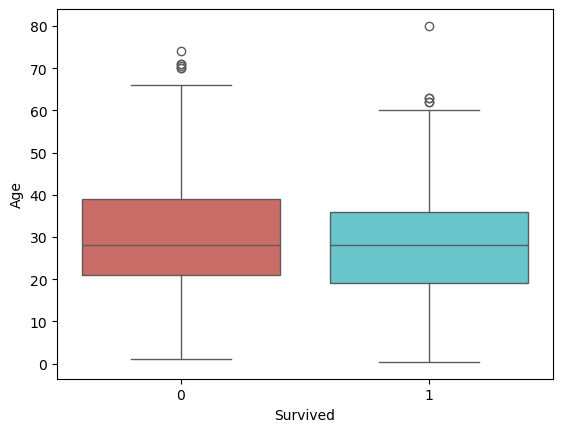

In [23]:
#boxplot between survival and age on training set
sns.boxplot(x='Survived',y='Age',data=train,palette='hls')

<Axes: xlabel='Survived', ylabel='SibSp'>

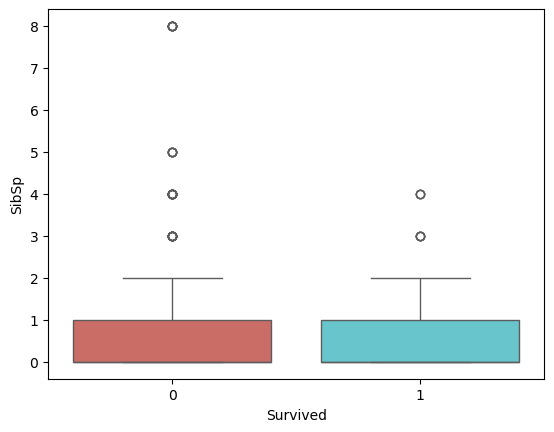

In [25]:
#boxplot between survival and sibsp on training set
sns.boxplot(x='Survived',y='SibSp',data=train,palette='hls')

<Axes: xlabel='Survived', ylabel='Parch'>

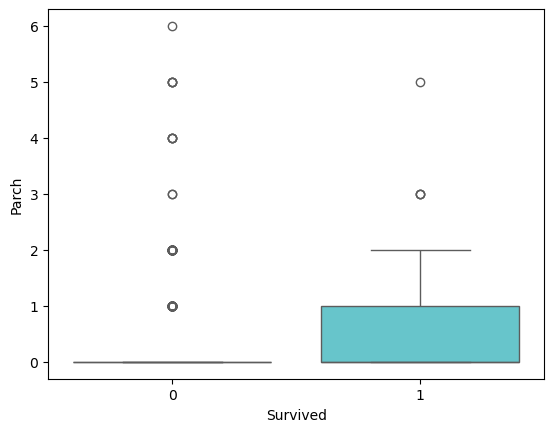

In [28]:
#boxplot between survival and parch
sns.boxplot(x='Survived',y='Parch',data=train,palette='hls')

<Axes: xlabel='Survived', ylabel='Fare'>

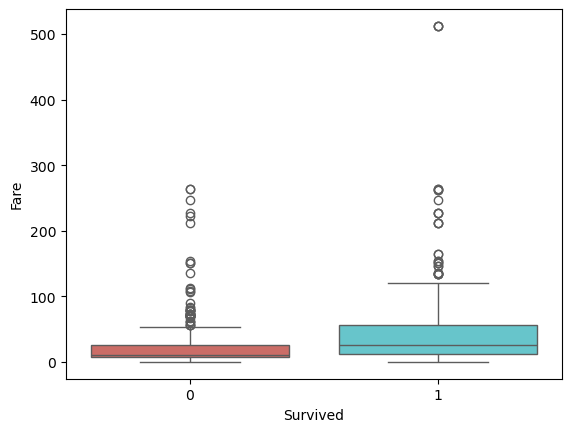

In [30]:
#boxplot between survival and fare on training set
sns.boxplot(x='Survived',y='Fare',data=train,palette='hls')

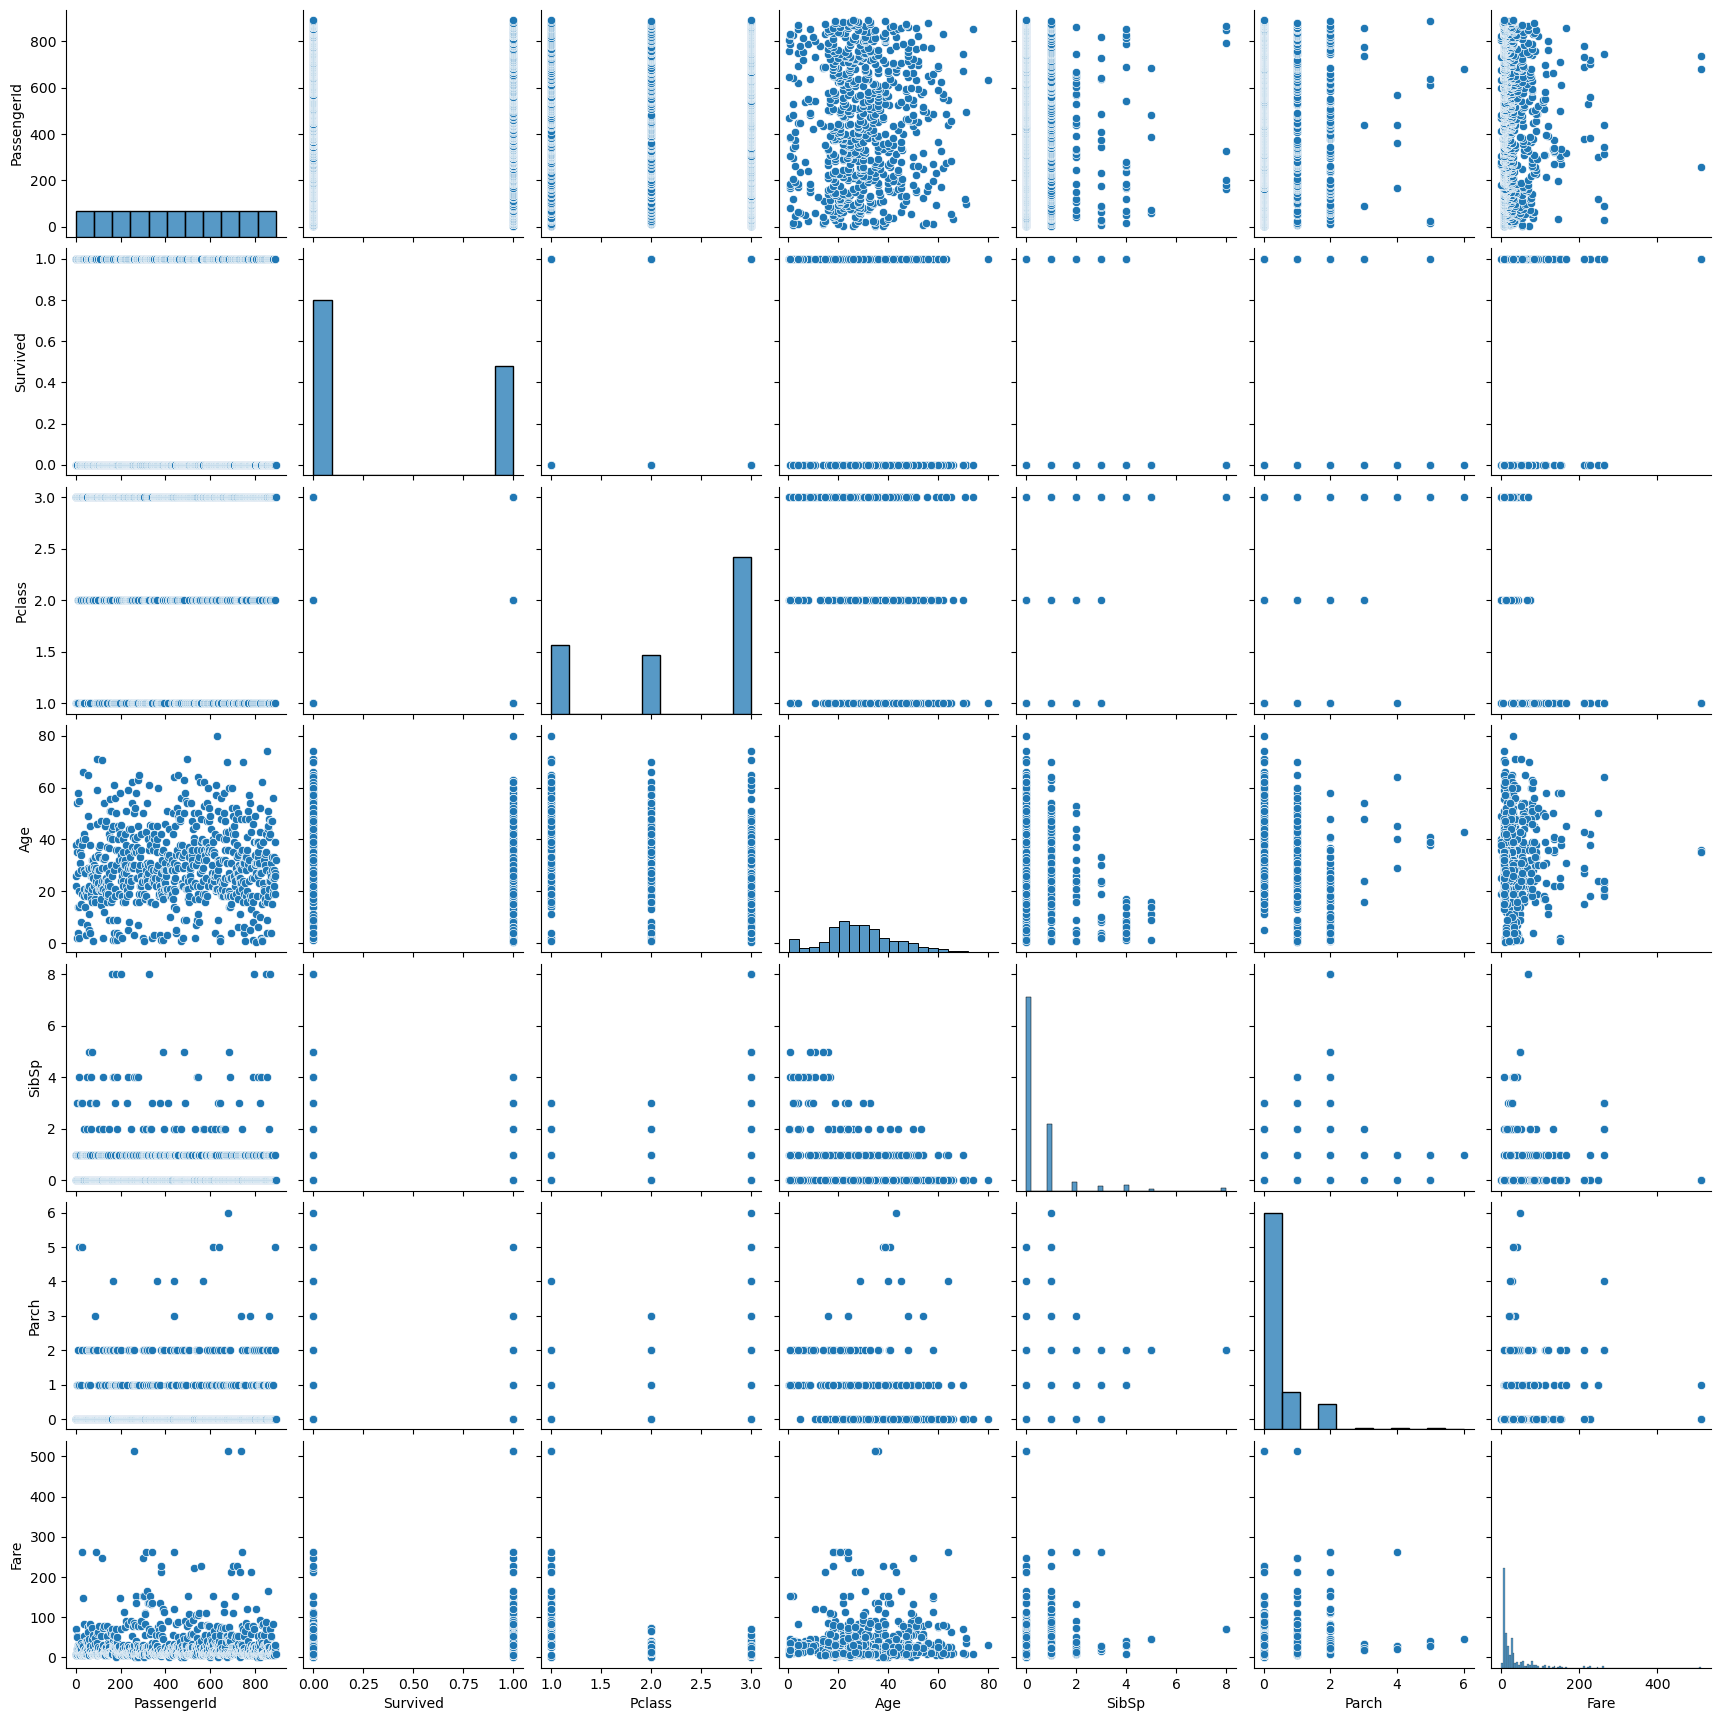

In [33]:
#visualization of training set using pairplot
sns.pairplot(train)


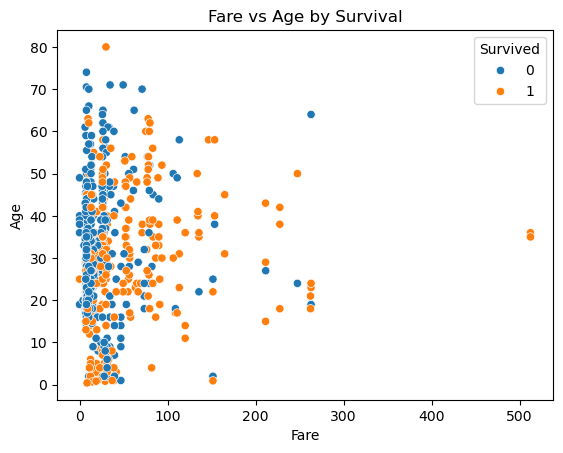

In [34]:
# Scatter plot between fare and age based on survival
sns.scatterplot(x='Fare', y='Age', hue='Survived', data=train)
plt.title('Fare vs Age by Survival')
plt.show()

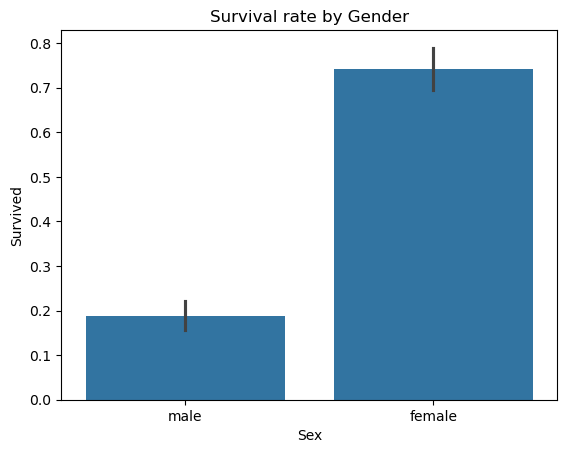

In [35]:
# Bar plots between survival and sex
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival rate by Gender')
plt.show()

Female survival rate is more compared to Male

<Axes: xlabel='Survived', ylabel='count'>

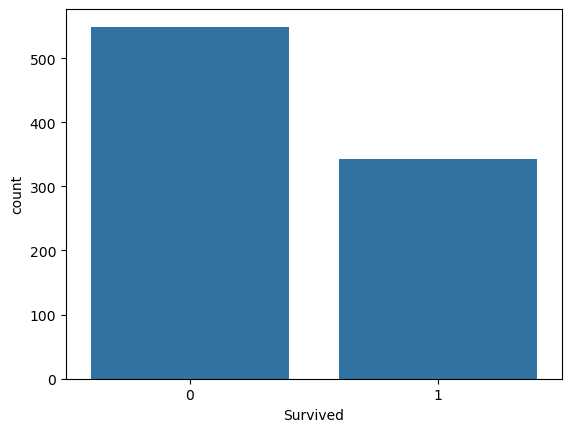

In [37]:
#countplot of survival rate on training set
sns.countplot(x='Survived',data=train)

Data Preprocessing 

In [39]:
#creating copy for training and testing set
train1=train.copy()
test1=test.copy()

In [40]:
#missing values
train1.isnull().sum(),test1.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [41]:
#imputing missing values on training set
train1['Age'].fillna(train['Age'].median(),inplace=True)
train1['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)

In [42]:
#imputing missing values on testing set
test1['Age'].fillna(test['Age'].median(),inplace=True)
test1['Fare'].fillna(test['Fare'].median(),inplace=True)

In [43]:
#checking if there are any null values left
train1.isnull().sum(),test1.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         0
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          327
 Embarked         0
 dtype: int64)

In [44]:
#creating dummy variables for Sex and Embarked in training and testing dataset
train1=pd.get_dummies(train1,columns=['Sex','Embarked'],dtype=int)
test1=pd.get_dummies(test1,columns=['Sex','Embarked'],dtype=int)

In [45]:
#view of training set after creating dummy variables
train1.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [46]:
#view of tetsing set after creating dummy variables
test1.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,1,0,0,0,1


In [47]:
#correlation between passengerid and survival
train1['PassengerId'].corr(train1['Survived'])

-0.0050066607670664846

correlation is very weak between passengerid and survival as passengerid is just a unique identifier

Dropping following columns:

PassengerId: It is unique identifer and has no predictive value

Name: It is not useful

Ticket: Not useful

Cabin: lot of missing values

In [49]:
#dropping PassengerId,Name,Ticket,cabin
train1=train1.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
test1=test1.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [50]:
#shape of training and testing set after dropping unimportant features
train1.shape,test1.shape

((891, 11), (418, 10))

In [51]:
train1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [52]:
test1.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


Building predictive Models

In [54]:
#splitting dataset to features and target
x_train=train1.drop('Survived',axis=1)
y_train=train1['Survived']
x_test=test1

Lightgbm model

In [56]:
!pip install lightgbm

In [57]:
#importing lightgbm and creating dataset object
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)

In [58]:
#defining parameter values
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [59]:
#building ligtgbm model
clf = lgb.train(params, d_train, 500)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [60]:
#Prediction for testing set
y_pred1_test=clf.predict(x_test)

In [61]:
#prediction on training set
y_pred1_train=clf.predict(x_train)

In [63]:
predictions1_train = [round(value) for value in y_pred1_train]

In [75]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_train,predictions1_train)


0.8170594837261503

In [82]:
!pip install xgboost


XGBoost model 

In [84]:
#importing xgboost classifier
from xgboost import XGBClassifier

In [86]:
# fit model on training data
model = XGBClassifier(max_depth =6, n_estimators=500, learning_rate=0.50,gamma=0.5, objective='binary:logistic')
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [97]:
# make predictions for test data
y_pred2_test= model.predict(x_test)

In [99]:
#make prediction for train data
y_pred2_train=model.predict(x_train)

In [101]:
#rounding value of predictions
predictions2_train = [round(value) for value in y_pred2_train]

In [103]:
#accuracy score of xgboost model
accuracy_score(y_train,predictions2_train)

0.9023569023569024